# Determinant QMC data visualization

## Are you testing or making plots?

In [8]:
SAVEPLOTS = True

## Load simulation data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
from pylab import *

NSITES = 64
dt = 0.0625
beta = 4.
L = 64
t = 1.
U = 2.
mu = 0.
totalMCSweeps = 2048
freq = 4
intsize = 16
geom = 10
ny = 4

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

# Load weights to plot

weights = np.loadtxt(simDir + '/Log-weights.csv')

WL = weights.size

latSweeps = np.arange(WL) + 1

# Metropolis Sampling convergence

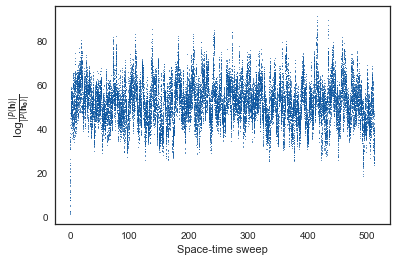

In [10]:
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Log-weights.png', dpi = 600)

# Magnetic structure factor $S(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \left\langle \mathbf S_{\mathbf i} \cdot \mathbf S_{\mathbf j} \right\rangle $

## Auto-correlation time in the measurement of the correlation function

In [3]:
magCorr = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv')

Nx = int(NSITES / 2 / ny)

Ny = ny 

gridX = np.arange(Nx)

gridY = np.arange(Ny)

SzeroSrA = np.zeros((Nx, Ny))
SzeroSrB = np.zeros((Nx, Ny))

for x in range(Nx):
    for y in range(Ny):
        SzeroSrA[x, y] = magCorr[0, Nx*y + x]
        SzeroSrB[x, y] = magCorr[0, Nx * Ny + Nx*y + x]

print("Correlations by distance:\n", SzeroSrA)

Correlations by distance:
 [[  6.05387187e-01   1.50697873e-02   6.48804807e-03   5.58950994e-03]
 [  2.05921255e-02   2.25213859e-03   3.01281264e-03   7.25808310e-03]
 [  4.49849143e-03  -9.59382790e-04   4.28848117e-03  -8.41485356e-03]
 [ -6.60609249e-03   2.33707672e-03  -3.08568614e-03   4.64064611e-06]
 [  1.39527038e-03   4.76355015e-03   2.96839476e-03   5.95039106e-03]
 [  7.53169853e-03   3.86069869e-03   2.74325167e-03   8.42810291e-03]
 [  1.96773346e-03   3.68711369e-03   7.17027525e-03   8.57166517e-03]
 [  1.48162266e-02   1.48978580e-02   3.72138350e-03   5.72985531e-03]]


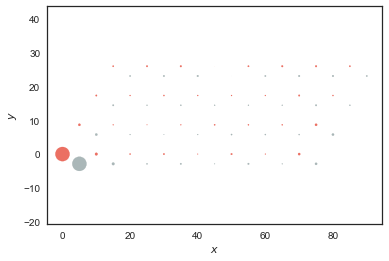

In [26]:
plt.figure(1, figsize = (8,8))
dist = 10
a1 = np.arange(Nx)
a2 = np.arange(Ny)
vs = np.zeros((2 * Nx * Ny , 2))
lat = np.zeros((2 * Nx * Ny))
clr = np.chararray((2 * Nx * Ny), itemsize = 10)
v1 = dist * np.array([1, 0])
v2 = dist * np.array([1 / 2, np.sqrt(3) / 2])
for i in range(Nx):
    for j in range(Ny):
        for k in range(2):
            
            vs[Nx * Ny * k + Nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 + k * dist *\
            np.array([1 / 2,- 1 / ( 2 * np.sqrt(3) )])
            
            lat[Nx * Ny * k + Nx * j + i]\
            =  400 * (magCorr[0, Nx*j + i])
            
            if k == 0 :
                clr[Nx * j + i] = "#e74c3c"
            if k == 1 :
                clr[Nx * Ny + Nx * j + i] = "#95a5a6"

dotscale = 200

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat) / max(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig(plotDir + '/CorrelationsDots.png', dpi = 600)

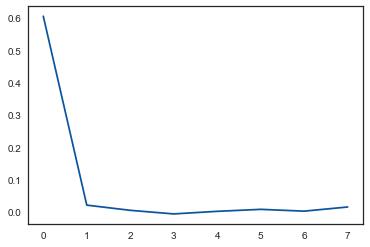

In [36]:
plt.plot(magCorr[0, :Nx])

## Fourier transform to obtain the structure factor    

In [42]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/Nx, qMax/Nx)
qsY = np.arange(0, qMax + qMax/Ny, qMax/Ny)
S = np.zeros((Nx+1, Ny+1))
dist = 0

for idxX, qx in enumerate(qsX):
    for idxY, qy in enumerate(qsY):
        for x1 in range(Nx):
            for y1 in range(Ny):
                for x2 in range(Nx):
                    for y2 in range(Ny):
                        S[idxX, idxY] += 2 * np.cos(0.5 * (x1 - x2) * qx + np.sqrt(3) / 2 *(y1-y2) *qy )\
                        * magCorr[Nx * y1 + x1, Nx*y2 + x2]
                        #S[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx + np.sqrt(3) / 2 *(y1-y2) *qy )\
                        #* magCorr[Nx*Ny + Nx * y1 + x1, Nx * Ny + Nx*y2 + x2]

S /=  (NSITES)


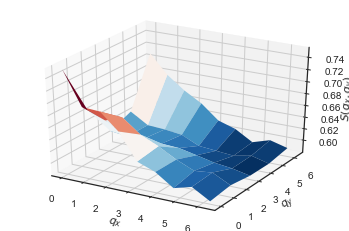

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, S.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q).png', dpi = 600)

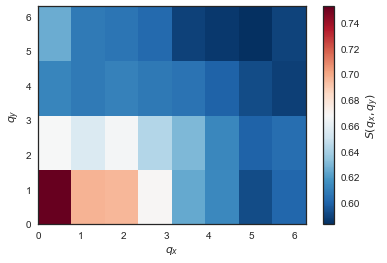

In [44]:
fig, ax = plt.subplots()

p = ax.pcolor(qsX, qsY, S.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)pcolor.png', dpi = 600)

### Antiferromagnetism

It has a maximum at $\bf{q} = \bf{\pi}$ signaling quasi-AF order

In [45]:
maxInds = np.unravel_index(np.argmax(S), (Nx+1, Ny+1))

print("Maximum of S(q): ")
print('qx', qsX[maxInds[0]])
print('qy', qsY[maxInds[1]])

Maximum of S(q): 
qx 0.0
qy 0.0


## A comparison that could be useful

By the definition of the ZZ magnetic susceptibility

$\chi(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \int_0^\beta \left\langle \mathbf S_{\mathbf i}(\tau) \cdot \mathbf S_{\mathbf j}(0) \right\rangle d\tau $

we obtain an important identity

$\chi ( 0 ) = \beta S ( 0 ) ,$

which we used to check whether our results are consistent.

Unequal-time measurements are more prone to fluctuations and thus there are minor variations due to higher variance of the corresponding estimators.

In [46]:
print("beta S (0): ", S[0, 0] * beta)

beta S (0):  3.01042595157


In [47]:
UneqMagCorr = np.loadtxt(simDir + '/UneqTimeSzCorrelations.csv')

# Compute structure factor    
    
n_qs = NSITES
qMax = 2*np.pi
threshold = 0
qsX = np.arange(threshold * qMax/n_qs, qMax - (threshold - 1) * qMax/n_qs , qMax/n_qs)
qsY = np.arange(threshold * qMax/n_qs, qMax - (threshold - 1) * qMax/n_qs , qMax/n_qs)
MagSus = np.zeros((n_qs - 2 * threshold + 1, n_qs - 2 * threshold + 1))

Nx = int(np.sqrt(NSITES))

for idxX, qx in enumerate(qsX):
    for idxY, qy in enumerate(qsY):
        for x1 in range(Nx):
            for y1 in range(Nx):
                for x2 in range(Nx):
                    for y2 in range(Nx):
                        MagSus[idxX, idxY] += np.cos((x1 - x2) * qx + (y1-y2) *qy ) * UneqMagCorr[Nx * y1 + x1, Nx*y2 + x2]

MagSus /= (NSITES )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.xlabel(r'q')
plt.ylabel(r'$\chi(q)$')

X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, MagSus.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$\chi(q_x, q_y)$')

if SAVEPLOTS == True:
    plt.savefig(plotDir + '/chi(q).png', dpi = 600)

FileNotFoundError: [Errno 2] No such file or directory: '../data/64sites_L=64_beta=4.0_dt_0.0625_t_1.0_U_2.0_mu_0.0/data-to-reproduce/totalMCSweeps_2048_freq_4_intsize_16_geom_10_ny_4/UneqTimeSzCorrelations.csv'

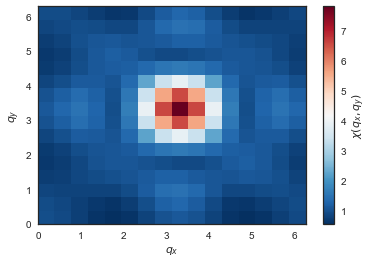

In [15]:
fig, ax = plt.subplots()

p = ax.pcolor(qsX, qsY, MagSus.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig.colorbar(p)
cb.set_label(r'$\chi (q_x, q_y)$')
plt.savefig(plotDir + '/chi(q)pcolor.png', dpi = 600)

### Antiferromagnetism

Again, it has a maximum at $\bf{q} = \bf{\pi}$ signaling quasi-AF order

In [19]:
maxInds = np.unravel_index(np.argmax(MagSus), (n_qs+1, n_qs+1))

print("Maximum of Chi (q)")
print('qx', qsX[maxInds[0]])
print('qy', qsY[maxInds[1]])

Maximum of Chi (q)
qx 3.14159265359
qy 3.14159265359


## $\chi (q = 0 )$ and $\chi (q = \pi )$

In [17]:
print("Chi (q = 0): ", MagSus[0, 0])
print("Chi (q = pi): ", MagSus[maxInds[0], maxInds[0]])

Chi (q = 0):  0.949330654494
Chi (q = pi):  7.82491993346
